---
---
# Regression in Neural Network

---
---

## Libraries Imports

In [9]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

## Loading the Data

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

This dataset was obtained from the StatLib repository [here](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) .

#### **Input Varibles:**


| Feature          | Description                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------|
| **MedInc**           | Median income of households within a block group, expressed in tens of thousands of dollars.       |
| **HouseAge**         | Median age of houses within a block.                                                              |
| **Rooms**            | Average number of rooms per household.                                                            |
| **Bedrooms**         | Average number of bedrooms per household.                                                         |
| **Population**       | Total number of people residing within a block.                                                   |
| **Households**       | Total number of households, a group of people residing within a home unit, for a block.           |
| **Latitude**         | A measure of how far north a house is; a type of geographic tagging.                              |
| **Longitude**        | A measure of how far west a house is; a type of geographic tagging.                               |

#### **Target Varible:**

>- **Median House Value:** The target variable for prediction, representing the median value of homes in thousands of dollars.

In [2]:
# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


## Modeling:

### Neural Networks
Neural networks are computational models inspired by the brain's architecture, designed to recognize patterns from complex data. They consist of layers of interconnected nodes (neurons), where each node processes input data and passes its output to subsequent nodes. Neural networks are widely used for tasks such as image recognition, speech recognition, and natural language processing due to their ability to learn from data.

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/d/d2/Neural_network_explain.png)


### Keras.models.Sequential
The `Sequential` model in Keras is a linear stack of layers that creates a neural network. It is simple to use and sufficient for building most kinds of neural network models where each layer has exactly one input tensor and one output tensor. It allows for the easy construction of a model layer by layer.
> **Link to Docs:** [Sequential Model Documentation](https://keras.io/api/models/sequential/)

### Keras.layers.Dense
A `Dense` layer in Keras is a deeply connected neural network layer, where each neuron receives input from all neurons of the previous layer, commonly known as a fully connected (FC) or dense layer. It is the most basic layer used in neural networks for learning non-linear combinations of features.
> **Link to Docs:** [Dense Layer Documentation](https://keras.io/api/layers/core_layers/dense/)

### Keras.models.compile
The `compile` method in Keras is used to configure the model for training by specifying the optimizer, loss function, and metrics to be used. It prepares the model with all it needs to know before it can start training.
> **Link to Docs:** [Model Compile Documentation](https://keras.io/api/models/model_training_apis/#compile-method)

### Loss
In the context of neural networks, a loss function measures how well the model does in terms of being able to predict the expected outcome. It is a method of evaluating how the algorithm models the data. If predictions deviate from actual results, loss functions provide a measure of these deviations.
> **Link to Docs:** [Loss Functions Documentation](https://keras.io/api/losses/)

### Optimizer
An optimizer is an algorithm or method used to change the attributes of the neural network, such as weights and learning rate, to reduce losses. Optimizers help to minimize (or maximize) an objective function (the loss function) associated with the model.
> **Link to Docs:** [Optimizer Documentation](https://keras.io/api/optimizers/)


In [3]:
# Build the regression neural network model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mean_squared_error", optimizer="sgd")


## Training & Evaluation:

### Keras model.fit

The `model.fit` method in Keras is used to train the neural network model on a fixed number of epochs (iterations over the entire data). This method applies the training process by feeding the training data into the model, adjusting the model's weights (parameters) based on the loss function and optimizer defined in the `compile` method. During training, the model learns to minimize the loss function, improving its accuracy and performance over time.

Key parameters include:
- **x**: Training data.
- **y**: Target data (labels).
- **epochs**: Number of times to iterate over the training dataset.
- **batch_size**: Number of samples per gradient update.
- **validation_data**: Data on which to evaluate the loss and any model metrics at the end of each epoch.

The method returns a `History` object that contains record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values, if applicable.

> **Link to Docs:** [model.fit Documentation](https://keras.io/api/models/model_training_apis/#fit-method)

### Keras model.evaluate

The `model.evaluate` method in Keras is used to evaluate the trained model's performance on a separate dataset typically not seen by the model during training, known as the validation or test dataset. This method provides the loss value and metrics values for the model in test mode.

Key parameters include:
- **x**: Test data.
- **y**: Target data (labels).
- **batch_size**: Number of samples per evaluation step.

This method is crucial for understanding the effectiveness of the model, indicating how well it can generalize to new data beyond the training examples. It returns the loss value and any additional metrics specifically requested when compiling the model, helping to assess performance.

> **Link to Docs:** [model.evaluate Documentation](https://keras.io/api/models/model_training_apis/#evaluate-method)

Both methods are integral to the machine learning workflow in Keras, enabling the training and validation of neural network models to ensure they perform effectively on the task at hand.

In [4]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))
# Evaluate the model on the test set
mse_test = model.evaluate(X_test_scaled, y_test)

Epoch 1/20
363/363 [==============================] - 9s 9ms/step - loss: 1.0590 - val_loss: 0.5491
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5238 - val_loss: 0.4929
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.4891 - val_loss: 0.4721
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4724 - val_loss: 0.4582
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4556 - val_loss: 0.4476
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4441 - val_loss: 0.4403
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4315 - val_loss: 0.4301
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4258 - val_loss: 0.4294
Epoch 9/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4195 - val_loss: 0.4201
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4181 - val_loss: 0.4209

In [5]:
# Make predictions on new instances
X_new = X_test_scaled[:3]  # Pretend these are new instances
y_pred = model.predict(X_new)

print("Mean Squared Error on Test Set:", mse_test)
print("Predictions for the first 3 instances:", y_pred)

1/1 [==============================] - 0s 73ms/step
Mean Squared Error on Test Set: 0.36683303117752075
Predictions for the first 3 instances: [[0.9111631]
 [1.9334687]
 [1.1342798]]


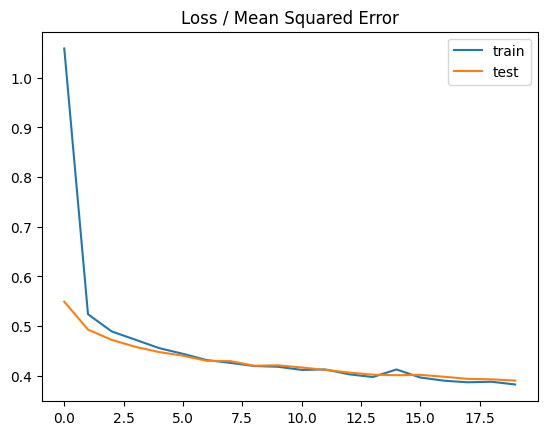

In [10]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Let's experiment with different configurations for our neural net

In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) # make sure a GPU exists

# Define the model builder function to create and evalute the model based on our input
def build_and_evaluate_model(n_neurons, activation, input_shape, X_train, y_train, X_valid, y_valid, X_test, y_test):
    with tf.device('/GPU:0'):  # Explicitly run on GPU:0 if available for running speed
        model = keras.models.Sequential([
            keras.layers.Dense(n_neurons, activation=activation, input_shape=input_shape),
            keras.layers.Dense(1)
        ])
        model.compile(loss="mean_squared_error", optimizer="sgd")

        # Train the model
        history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)

        # Evaluate the model on the test set
        mse_test = model.evaluate(X_test, y_test, verbose=0)
    return history, mse_test


Num GPUs Available:  1


In [14]:
# define your Parameter grid that you want to experiment on
param_grid = {
    'n_neurons': [20, 30, 40],
    'activation': ['relu', 'tanh']
}

# Manual exploration of parameter combinations
# Note: This may take sometimes even with a GPU
results = []
for n_neurons in param_grid['n_neurons']:
    for activation in param_grid['activation']:
        # Build, evaluate the model, and store the result with the parameters
        history, mse_test = build_and_evaluate_model(n_neurons, activation, X_train_scaled.shape[1:], X_train_scaled, y_train, X_valid_scaled, y_valid, X_test_scaled, y_test)
        results.append({
            'n_neurons': n_neurons,
            'activation': activation,
            'mse_test': mse_test,
            'history': history
        })


# Print all results
for result in results:
    print(result)

{'n_neurons': 20, 'activation': 'relu', 'mse_test': 0.3845357298851013, 'history': <keras.src.callbacks.History object at 0x7c256928ab30>}
{'n_neurons': 20, 'activation': 'tanh', 'mse_test': 0.38354983925819397, 'history': <keras.src.callbacks.History object at 0x7c256903d990>}
{'n_neurons': 30, 'activation': 'relu', 'mse_test': 0.35335153341293335, 'history': <keras.src.callbacks.History object at 0x7c2568f16a40>}
{'n_neurons': 30, 'activation': 'tanh', 'mse_test': 0.3841405212879181, 'history': <keras.src.callbacks.History object at 0x7c2568ff3460>}
{'n_neurons': 40, 'activation': 'relu', 'mse_test': 0.3669816255569458, 'history': <keras.src.callbacks.History object at 0x7c2568ebbf10>}
{'n_neurons': 40, 'activation': 'tanh', 'mse_test': 0.38909515738487244, 'history': <keras.src.callbacks.History object at 0x7c2568da0d90>}


In [20]:
import plotly.graph_objects as go

def plot_results(results):
    fig = go.Figure()

    for result in results:
        history = result['history']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        experiment_label = f"n_neurons: {result['n_neurons']}, Activation: {result['activation']}"

        # Adding training loss curve for each experiment
        fig.add_trace(
            go.Scatter(
                x=list(range(1, len(train_loss) + 1)),
                y=train_loss,
                mode='lines',
                name=f'Training Loss - {experiment_label}',
                legendgroup=experiment_label,  # this is the key to group legends
                visible='legendonly'  # make it hidden by default, can be toggled in the legend
            )
        )

        # Adding validation loss curve for each experiment
        fig.add_trace(
            go.Scatter(
                x=list(range(1, len(val_loss) + 1)),
                y=val_loss,
                mode='lines',
                name=f'Validation Loss - {experiment_label}',
                legendgroup=experiment_label,  # this is the key to group legends
                visible='legendonly'  # make it hidden by default, can be toggled in the legend
            )
        )

    # Update layout with x and y axis titles
    fig.update_layout(
        height=800,
        width=1400,
        title_text="Interactive Training and Validation Loss Curves",
        xaxis_title='Epochs',  # Describing the x-axis
        yaxis_title='Loss',  # Describing the y-axis
        showlegend=True,
        legend_title_text='Experiment Filters'
    )

    fig.show()

# Assuming the `results` variable is already populated with the history object included
plot_results(results)


In [15]:
# Find the configuration with the minimum MSE
best_result = min(results, key=lambda x: x['mse_test'])
print(f"Best configuration with least MSE: {best_result}")

Best configuration with least MSE: {'n_neurons': 30, 'activation': 'relu', 'mse_test': 0.35335153341293335, 'history': <keras.src.callbacks.History object at 0x7c2568f16a40>}


### **Exercise:**

- Try to rewrite the above experimentations using GridSeachCV and keras regression wrapper
- Change the optimizer(we will get into it more in the future) and always use relu to make the experiments faster
- Experiment with more configs
